In [14]:
import pandas as pd

Loading the dataset

In [15]:
data = pd.read_csv('Corona (5) (2) (1) (1) (1) (2) (1).csv')

# Examining data distributions

In [16]:
print(data.head())

   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  


In [17]:
print(data.describe())

           UserName    ScreenName
count  41156.000000  41156.000000
mean   24377.490961  69329.490961
std    11880.873691  11880.873691
min     3799.000000  48751.000000
25%    14088.750000  59040.750000
50%    24377.500000  69329.500000
75%    34666.250000  79618.250000
max    44955.000000  89907.000000


In [18]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41156 entries, 0 to 41155
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41156 non-null  int64 
 1   ScreenName     41156 non-null  int64 
 2   Location       32566 non-null  object
 3   TweetAt        41156 non-null  object
 4   OriginalTweet  41156 non-null  object
 5   Sentiment      41156 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB
None


# Identifying missing values

In [19]:
missing_values = data.isnull().sum()
print("count of missing values\n", missing_values)

count of missing values
 UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64


# Handling Missing values


### Dropping all the null values

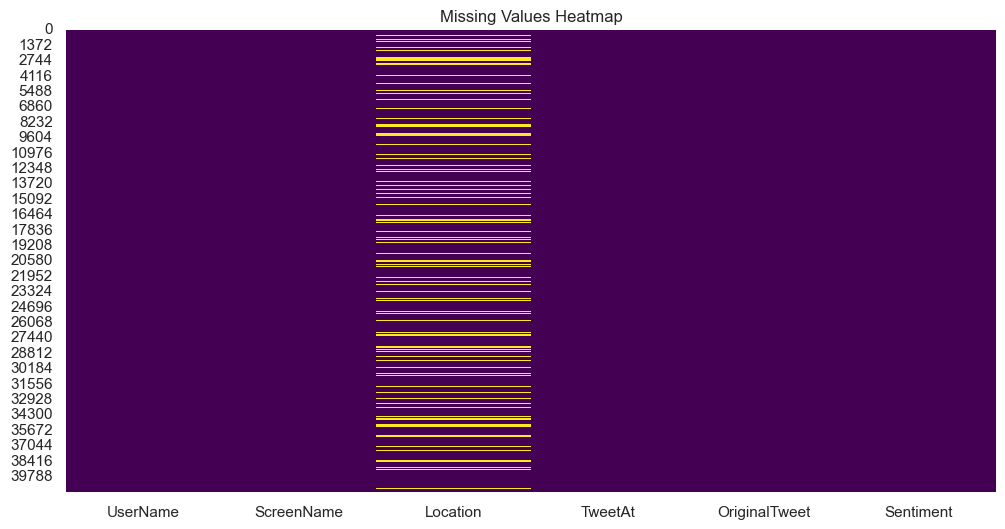

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Values Heatmap')
plt.show()

data = data.dropna()

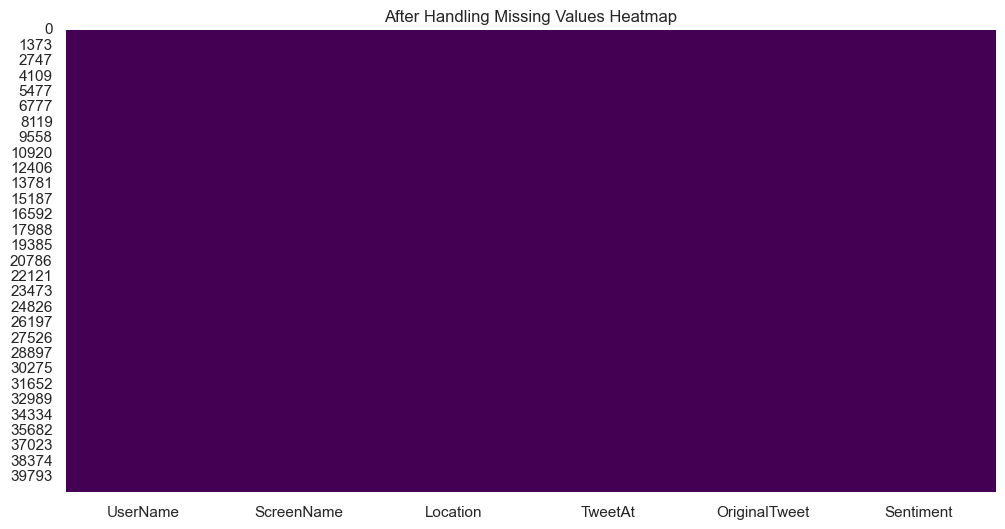

In [21]:
sns.heatmap(data.isnull(), cbar = False, cmap = 'viridis')
plt.title('After Handling Missing Values Heatmap')
plt.show()

# Visualizing realtionships between variables

### Following graph shows the sentiments of the users and it's count

#### It shows the sentiment of users were majorly positive. However, it was closely followed by negative sentiment

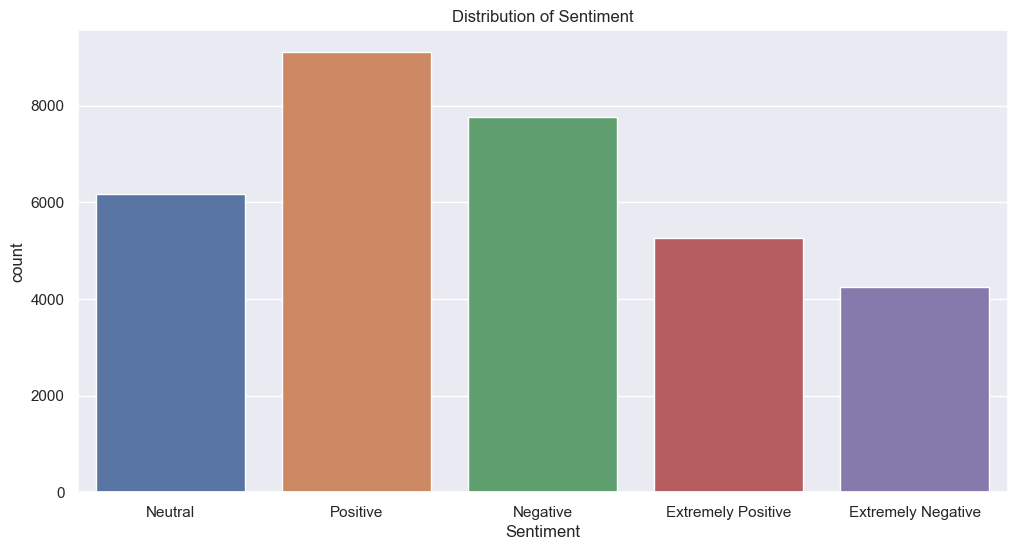

In [22]:
sns.countplot(data=data, x='Sentiment')
plt.title('Distribution of Sentiment')
plt.show()

### Following graph is a wordcloud which gives us the keywords used in the tweets and are sorted as per count.

#### It shows that the most used words in the tweets were covid,people, grocery store, coronavirus,supermarket,etc.

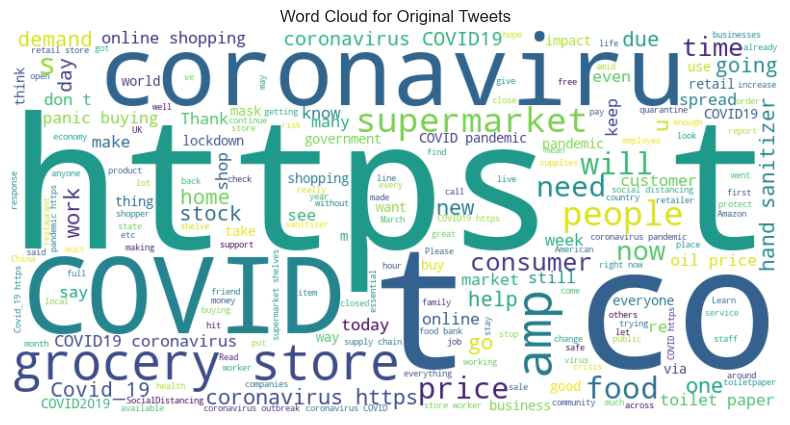

In [23]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['OriginalTweet']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Original Tweets')
plt.axis('off')
plt.show()

### Following graph shows the relationship between the tweet dates and the sentiment of the users on that date

#### It shows sentiments of the user on a specific date and almost everyday the positive sentiments were in majority. However, they are closely followed by Negative,neutral and then extremely positive sentiments. Everyday, people with extremely negative sentiments were minimum.

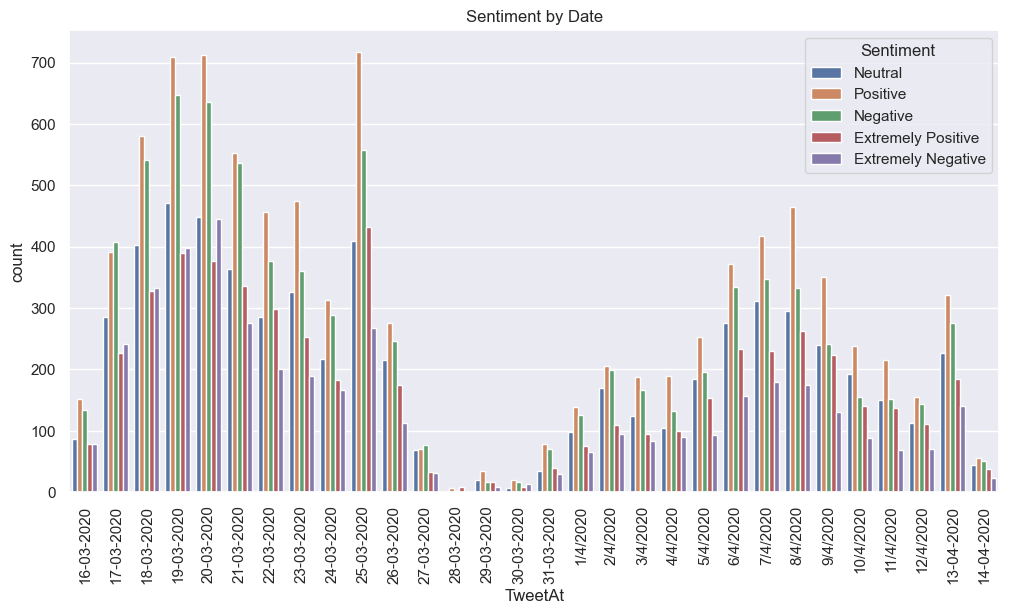

In [24]:
# Visualize the relationship between 'Tweet' and 'Sentiment'
sns.set(rc={'figure.figsize':(12, 6)})
sns.countplot(data=data, x='TweetAt', hue='Sentiment')
plt.xticks(rotation=90)
plt.title('Sentiment by Date')
plt.show()